**Multi Layer Perceptrons(fully connected layer)**

In [3]:
import numpy as np

In [122]:
ac=np.load('E:/techno/Acid.npy')
am=np.load('E:/techno/ambient.npy')
ho=np.load('E:/techno/House.npy')
ind=np.load('E:/techno/Industrial.npy')
det=np.load('E:/techno/Detroit.npy')
mini=np.load('E:/techno/Minimal.npy')#load saved output neurons from penultimate layer of musicnn and put them into arrays

In [123]:
ac_size=ac.shape[0]
am_size=am.shape[0]
ho_size=ho.shape[0]
ind_size=ind.shape[0]
det_size=det.shape[0]
mini_size=mini.shape[0] #get the size of each dataset by genre

In [124]:
ac_l=np.full((ac_size,1), 0, dtype=int)
ac=np.append(ac,ac_l,axis=1)
am_l=np.full((am_size,1), 1, dtype=int)
am=np.append(am,am_l,axis=1)
ho_l=np.full((ho_size,1), 2, dtype=int)
ho=np.append(ho,ho_l,axis=1)
ind_l=np.full((ind_size,1), 3, dtype=int)
ind=np.append(ind,ind_l,axis=1)
det_l=np.full((det_size,1), 4, dtype=int)
det=np.append(det,det_l,axis=1)
mini_l=np.full((mini_size,1), 5, dtype=int)
mini=np.append(mini,mini_l,axis=1) 
#combine input neurons with its corresponding labels as 0 to 5 standing for different sub-genres

In [125]:
neurons=np.vstack((ac,am,ho,ind,det,mini))
#combine all the subgenre input neurons together as a whole array with corresponding labels

In [126]:
unique, counts = np.unique(neurons[:,-1], return_counts=True)
dict(zip(unique, counts)) # count the number of audios in each category

{0.0: 100, 1.0: 100, 2.0: 100, 3.0: 97, 4.0: 99, 5.0: 106}

In [127]:
neurons.shape #check the size of the input array

(602, 201)

In [128]:
np.random.shuffle(neurons) #shuffle the rows of the input arrays

In [129]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras import layers
from sklearn.model_selection import StratifiedKFold

In [185]:
x=neurons[:,0:200]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x) #standardize the input neurons

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y=np.transpose(neurons[:,-1])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
y_train_label = keras.utils.to_categorical(y_train, num_classes=6)
y_test_label = keras.utils.to_categorical(y_test, num_classes=6) #data preprocessing before going into the network

In [207]:
from keras import regularizers
from keras import optimizers
model = Sequential()
model.add(layers.BatchNormalization())
model.add(Dense(30, activation='relu', input_dim=200))
model.add(Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train,y_train_label,epochs=20,batch_size=60,validation_split=0.1,verbose=0) # model building

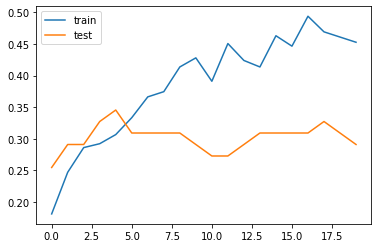

In [208]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show() # accuracy scores of train set and validation set over epoches

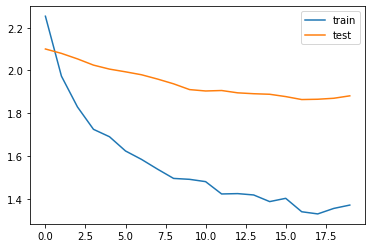

In [209]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()  # losses of train set and validation set over epoches

In [210]:
y_pred = model.predict_classes(X_test) 
from sklearn.metrics import classification_report, confusion_matrix
y_test=np.argmax(y_test_label, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred)) 

Confusion Matrix
[[ 2  0  1  2  1  3]
 [ 0 11  0  0  1  1]
 [ 0  2  3  1  1  2]
 [ 4  2  1  1  0  2]
 [ 3  0  3  0  1  1]
 [ 2  1  2  3  1  3]]


In [211]:
from sklearn.metrics import classification_report
target_names = ['Acid', 'Ambient', 'Tech House','Industiral','Detroit','Minimal']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Acid       0.18      0.22      0.20         9
     Ambient       0.69      0.85      0.76        13
  Tech House       0.30      0.33      0.32         9
  Industiral       0.14      0.10      0.12        10
     Detroit       0.20      0.12      0.15         8
     Minimal       0.25      0.25      0.25        12

    accuracy                           0.34        61
   macro avg       0.29      0.31      0.30        61
weighted avg       0.32      0.34      0.33        61



**Suport Vector Machine Linear Classifier**

In [215]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

E:\etc\conda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\etc\conda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [216]:
from sklearn.metrics import classification_report, confusion_matrix 
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.20      0.22      0.21         9
           1       0.82      0.69      0.75        13
           2       0.11      0.11      0.11         9
           3       0.33      0.20      0.25        10
           4       0.14      0.12      0.13         8
           5       0.28      0.42      0.33        12

    accuracy                           0.33        61
   macro avg       0.31      0.29      0.30        61
weighted avg       0.35      0.33      0.33        61

